# UTA Method

## Authors:
- Wojciech Bogacz 156034
- Krzysztof Skrobała 156039

In [1]:
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, value, LpStatus, LpMinimize

# Dataset
## 1.1. Description
As decision makers, we want to plan our vacation in the Mazurian lakes. There are many
yachts with several parameters to consider, and we want the best one for the best price.
We gathered 16 yachts from zegluj.pl website, and outlined 5 parameters: cost per day,
deposit, power of the engine, sail area, width of the boat.
Example yacht data:
Name PricePerDay Deposit EnginePower SailArea Width
Antila 24.4 290 1500 6 30 270
Antila 24 220 2000 4 27 270
Here we can say that Antila 24 is cheaper, but on the cost of the lower engine power
and the lower sail area. Unfortunately, there is no solution which is the best on every
criterion, so we aim to select boats with sensible trade-offs with the MCDA methods.
## 1.2. Criterion
### 1.2.1. Cost per day
This criterion specifies the cost of renting the boat. It has a continuous domain, and
hypothetically the owner can provide infinitely large value. Of course, the nature is of the
cost type. As a student, we prefer to boat for a limited budget. Therefore, we apply for
this criteria the highest weight equals 4.
### 1.2.2. Deposit
This criterion specifies the cost of deposit. It also has a continuous domain, without an
upper boundary. Of course, the nature is of cost type. This criterion is not very important,
so we assigned 1 as a weight.
### 1.2.3. Power of the engine
This criterion specifies the power of the engine in horsepower. It’s discrete and gain-type
parameter. Having more horsepower, gives me pleasure during the sailing. We assigned
2 as the weight.
### 1.2.4. Sail area
This criterion specifies the Sail area in cm2. It is continuous and gain-type parameter.
Having a greater area, provides faster boat and as a result more adventure experience. We
assigned 2 as the weight.
### 1.2.5. Width of the boat
This criterion specifies the width of the boat in cm. It is continuous and gain-type param-
eter. This parameter is not very relevant, however having greater boat, provides greater
space for the crew. We assigned 1 as the weight.

Uploading the dataset for analysis

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("dataset/uta/dataset.csv")

PricePerDay_tab = np.sort(df["PricePerDay"].to_numpy())[::-1]
Deposit_tab = np.sort(df["Deposit"].to_numpy())[::-1]
EnginePower_tab = df["EnginePower"].to_numpy()
EnginePower_tab.sort()
SailArea_tab = df["SailArea"].to_numpy()
SailArea_tab.sort()
Width_tab = df["Width"].to_numpy()
Width_tab.sort()

print(df)



               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

# UTA 2.1

Initialization of the model using Pulp library. 

In [3]:
prob = LpProblem("UTA_Method", LpMinimize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.1, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.3, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"


# Utility functions for all alternatives
alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var

    
    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"


print(alternatives)


               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

Initialization of the binary variables. 

In [4]:
v1 = LpVariable("v_Laguna 25_Antila 24.4", lowBound=0, cat="Binary")
v2 = LpVariable("v_Antila 24.4_Maxus 24 Evo", lowBound=0, cat="Binary")
v3 = LpVariable("v_Maxus 24 Evo_Mariner 24", lowBound=0, cat="Binary")
v4 = LpVariable("v_Mariner 24_Antila 24.4", lowBound=0, cat="Binary")
v5 = LpVariable("v_Phobos 24.5 #2_Phobos 25 #2", lowBound=0, cat="Binary")

Preference Information provided by Decision Maker.

In [5]:
epsilon = 0.01


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + epsilon - v1, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + epsilon - v2, "Pref_2"
prob += alternative_utilities["Maxus 24 Evo"] >= alternative_utilities["Mariner 24"] + epsilon - v3, "Pref_3"
prob += alternative_utilities["Mariner 24"] >= alternative_utilities["Laguna 25"] + epsilon -v4, "Pref_4"
prob += alternative_utilities["Phobos 24.5 #2"] >= alternative_utilities["Maxus 24 Evo #2"] + epsilon -v5, "Pref_5"


Objective function as a sum of binary variables, which will be minimize to search for the largest possible consistent set of preference information. 

In [6]:
prob += v1 + v2 + v3 + v4 + v5

In [7]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/a22fa8dbd6b046479e8a26c8e6351261-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/a22fa8dbd6b046479e8a26c8e6351261-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 117 COLUMNS
At line 372 RHS
At line 485 BOUNDS
At line 529 ENDATA
Problem MODEL has 112 rows, 59 columns and 197 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0.04 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0004I processed model has 15 rows, 20 columns (5 integer (5 of which binary)) and 56 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 0.0493823
Cbc0038I Pass   1: suminf.    0.04938 (3) obj. 0.0493823

1

The solver found the solution.

In [8]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 0.3
Antila_24.4_Utility = 0.3
Antila_24_Utility = 0.3
Antila_28.8_Utility = 0.0
Aquatic_25T_Utility = 0.4
Deposit_1000 = 0.1
Deposit_1400 = 0.1
Deposit_1500 = 0.0
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.0
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.0
EnginePower_6 = 0.0
EnginePower_8 = 0.0
Janmor_25_Utility = 0.3
Laguna_25_Utility = 0.4
Mariner_24_Utility = 0.3
Maxus_24_Evo_#2_Utility = 0.3
Maxus_24_Evo_Utility = 0.29
Maxus_24_Utility = 0.4
Phobos_24.5_#2_Utility = 0.89
Phobos_24.5_Utility = 0.0
Phobos_25_#2_Utility = 0.0
Phobos_25_Utility = 0.3
PricePerDay_190 = 0.3
PricePerDay_220 = 0.3
PricePerDay_240 = 0.3
PricePerDay_250 = 0.3
PricePerDay_260 = 0.3
PricePerDay_290 = 0.3
PricePerDay_300 = 0.3
PricePerDay_360 = 0.29
PricePerDay_390 = 0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.0
SailArea_31 = 0.0
Sail

As we can see in the output: 2 binary variables eaquals 1 therefore having these the set of the preference informations is inconsistent. As a result we have to remove these preference informations and check if the newer set will be consistent.

In [9]:
prob = LpProblem("UTA_Method", LpMinimize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.2, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.2, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"

alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var

    
    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"



print(alternatives)


               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

In [10]:
#Preference constraints provided by the decision maker
epsilon = 0.01


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + epsilon, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + epsilon, "Pref_2"
# prob += alternative_utilities["Maxus 24 Evo"] >= alternative_utilities["Mariner 24"] + epsilon, "Pref_3"
# prob += alternative_utilities["Mariner 24"] >= alternative_utilities["Laguna 25"] + epsilon, "Pref_4"
prob += alternative_utilities["Phobos 25 #2"] >= alternative_utilities["Phobos 24.5 #2"] + epsilon, "Pref_5"


In [11]:
prob += 0


In [12]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/e1d2e2b4eb2a415db75e339095e77847-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/e1d2e2b4eb2a415db75e339095e77847-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 115 COLUMNS
At line 347 RHS
At line 458 BOUNDS
At line 498 ENDATA
Problem MODEL has 110 rows, 55 columns and 188 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-107) rows, 3 (-52) columns and 6 (-182) elements
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):     

1

In [13]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 1.0
Antila_24.4_Utility = 0.4
Antila_24_Utility = 0.8
Antila_28.8_Utility = 0.6
Aquatic_25T_Utility = 0.4
Deposit_1000 = 0.2
Deposit_1400 = 0.2
Deposit_1500 = 0.2
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.2
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.2
EnginePower_6 = 0.2
EnginePower_8 = 0.2
Janmor_25_Utility = 0.8
Laguna_25_Utility = 1.0
Mariner_24_Utility = 0.6
Maxus_24_Evo_#2_Utility = 1.0
Maxus_24_Evo_Utility = 0.0
Maxus_24_Utility = 1.0
Phobos_24.5_#2_Utility = 0.6
Phobos_24.5_Utility = 0.8
Phobos_25_#2_Utility = 0.8
Phobos_25_Utility = 0.8
PricePerDay_190 = 0.2
PricePerDay_220 = 0.2
PricePerDay_240 = 0.2
PricePerDay_250 = 0.2
PricePerDay_260 = 0.2
PricePerDay_290 = 0.2
PricePerDay_300 = 0.2
PricePerDay_360 = 0.0
PricePerDay_390 = 0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.2
SailArea_31 = 0.2
SailAre

The solution is optimal thus we found the model which describes appropriately the decision maker's preference information.

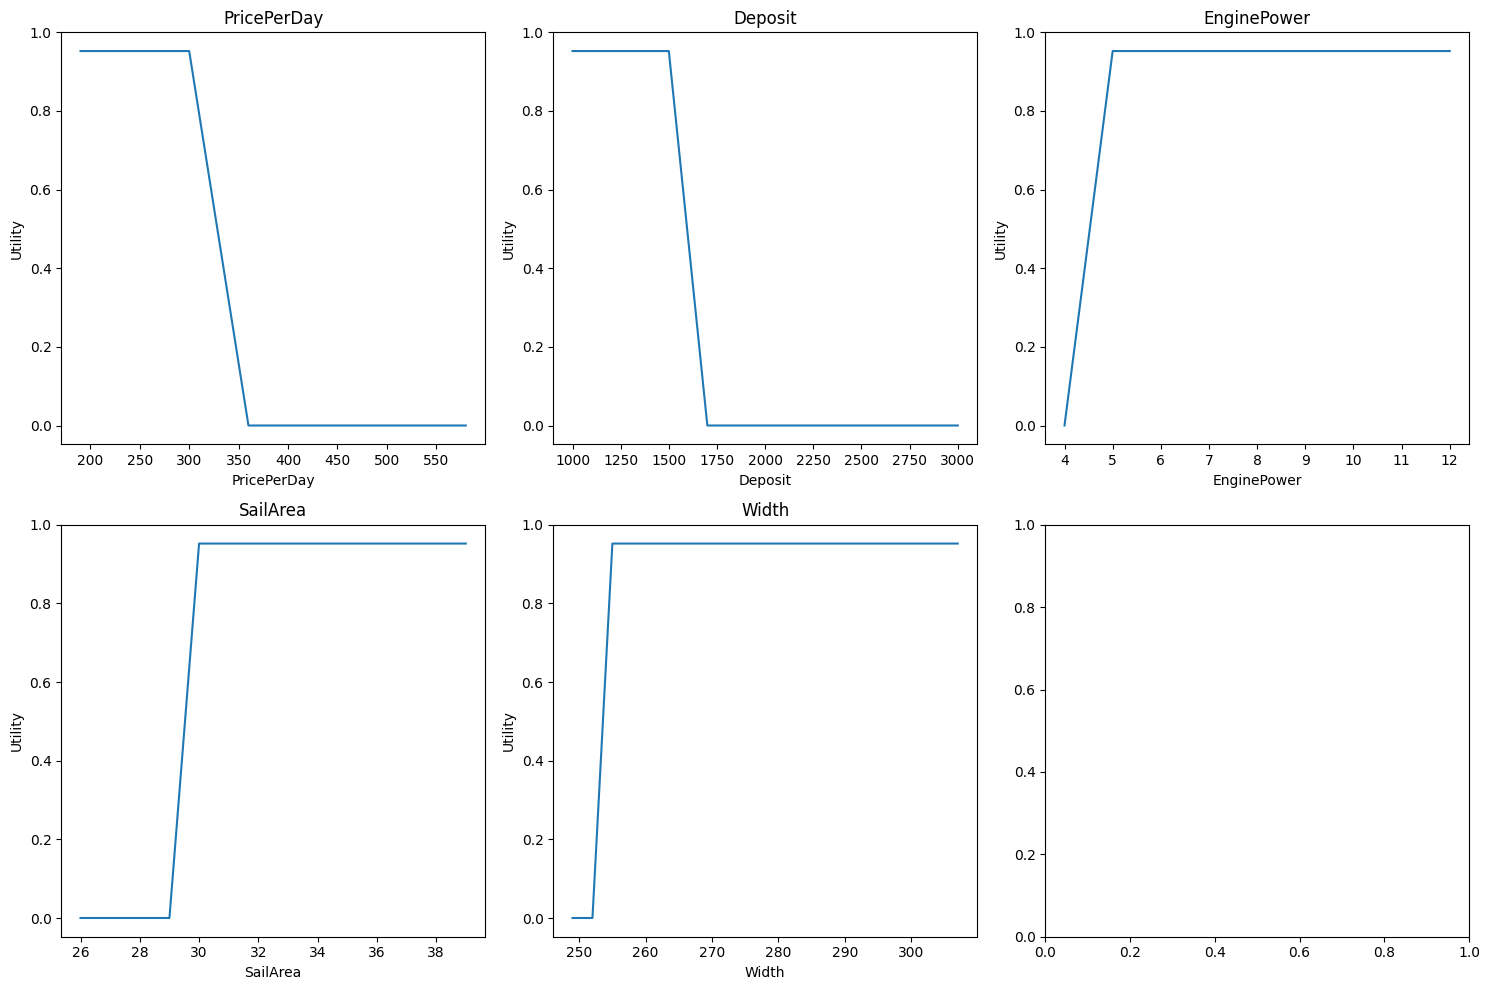

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
temp = [value(PricePerDay_vars[val]) for val in PricePerDay_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[0].plot(PricePerDay_tab, temp)
axs[0].set_title("PricePerDay")
axs[0].set_xlabel("PricePerDay")
axs[0].set_ylabel("Utility")
temp = [value(Deposit_vars[val]) for val in Deposit_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[1].plot(Deposit_tab, temp)
axs[1].set_title("Deposit")
axs[1].set_xlabel("Deposit")
axs[1].set_ylabel("Utility")
temp = [value(EnginePower_vars[val]) for val in EnginePower_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[2].plot(EnginePower_tab, temp)
axs[2].set_title("EnginePower")
axs[2].set_xlabel("EnginePower")
axs[2].set_ylabel("Utility")
temp = [value(SailArea_vars[val]) for val in SailArea_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[3].plot(SailArea_tab, temp)
axs[3].set_title("SailArea")
axs[3].set_xlabel("SailArea")
axs[3].set_ylabel("Utility")
temp = [value(Width_vars[val]) for val in Width_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[4].plot(Width_tab, temp)
axs[4].set_title("Width")
axs[4].set_xlabel("Width") 
axs[4].set_ylabel("Utility")

plt.tight_layout()
plt.show()


The marginal value funtions show how the model evaluates specyfic criterion. For example for cost-type criteria (PricePerDay and Deposit) we can see that maxiamal budget, which the Decision Maker is able to spend according to the model, is 350 for PricePerDay and around 1750 as a Deposit. The criteria Width and Engine Power are not very impoartant for the model, because for almost all values the functions get the highest possible results. The different sitation can be notice in SailArea criterion. Here the model divided values to 2 ranges: one that is not prefered and second which is acceptable.

# UTA 2.2

Having the set of the consistent preference informations we want to maximize the distance between the utility of reference alternatives.

In [15]:
prob = LpProblem("UTA_Method", LpMaximize)

PricePerDay_vars = {val: LpVariable(f"PricePerDay_{val}", lowBound=0, upBound=1) for val in PricePerDay_tab}
Deposit_vars = {val: LpVariable(f"Deposit_{val}", lowBound=0, upBound=1) for val in Deposit_tab}
EnginePower_vars = {val: LpVariable(f"EnginePower_{val}", lowBound=0, upBound=1) for val in EnginePower_tab}
SailArea_vars = {val: LpVariable(f"SailArea_{val}", lowBound=0, upBound=1) for val in SailArea_tab}
Width_vars = {val: LpVariable(f"Width_{val}", lowBound=0, upBound=1) for val in Width_tab}

# Monotonic constraints

for i in range(len(PricePerDay_tab) - 1):
    prob += PricePerDay_vars[PricePerDay_tab[i]] <= PricePerDay_vars[PricePerDay_tab[i + 1]], f"Monotonicity_PricePerDay_{i}"
for i in range(len(Deposit_tab) - 1):
    prob += Deposit_vars[Deposit_tab[i]] <= Deposit_vars[Deposit_tab[i + 1]], f"Monotonicity_Deposit_{i}"
for i in range(len(EnginePower_tab) - 1):
    prob += EnginePower_vars[EnginePower_tab[i]] <= EnginePower_vars[EnginePower_tab[i + 1]], f"Monotonicity_EnginePower_{i}"
for i in range(len(SailArea_tab) - 1):
    prob += SailArea_vars[SailArea_tab[i]] <= SailArea_vars[SailArea_tab[i + 1]], f"Monotonicity_SailArea_{i}"
for i in range(len(Width_tab) - 1):
    prob += Width_vars[Width_tab[i]] <= Width_vars[Width_tab[i + 1]], f"Monotonicity_Width_{i}"

# Normalization constraints
prob += PricePerDay_vars[PricePerDay_tab[0]] == 0, "Normalize_PricePerDay_Lowest"
prob += Deposit_vars[Deposit_tab[0]] == 0, "Normalize_Deposit_Lowest"
prob += EnginePower_vars[EnginePower_tab[0]] == 0, "Normalize_EnginePower_Lowest"
prob += SailArea_vars[SailArea_tab[0]] == 0, "Normalize_SailArea_Lowest"
prob += Width_vars[Width_tab[0]] == 0, "Normalize_Width_Lowest"
prob += PricePerDay_vars[PricePerDay_tab[-1]] + Deposit_vars[Deposit_tab[-1]] + EnginePower_vars[EnginePower_tab[-1]] + SailArea_vars[SailArea_tab[-1]] + Width_vars[Width_tab[-1]] == 1, "Normalize_Sum_One"

prob += PricePerDay_vars[PricePerDay_tab[-1]] <= 0.5, "Normalize_PricePerDay_Highest"
prob += Deposit_vars[Deposit_tab[-1]] <= 0.5, "Normalize_Deposit_Highest"
prob += EnginePower_vars[EnginePower_tab[-1]] <= 0.5, "Normalize_EnginePower_Highest"
prob += SailArea_vars[SailArea_tab[-1]] <= 0.5, "Normalize_SailArea_Highest"
prob += Width_vars[Width_tab[-1]] <= 0.5, "Normalize_Width_Highest"


# additional constraints
prob += Deposit_vars[Deposit_tab[-1]] >= 0.2, "Normalize_Deposit_Highest_1"
prob += PricePerDay_vars[PricePerDay_tab[-1]] >= 0.2, "Normalize_PricePerDay_Highest_2"
prob += EnginePower_vars[EnginePower_tab[-1]] >= 0.2, "Normalize_EnginePower_Highest_3"
prob += SailArea_vars[SailArea_tab[-1]] >= 0.2, "Normalize_SailArea_Highest_4"
prob += Width_vars[Width_tab[-1]] >= 0.2, "Normalize_Width_Highest_5"

alternatives = df.iloc[:]
alternative_utilities = {}

for index, row in alternatives.iterrows():
    name = row["Name"]
    
    utility_var = LpVariable(f"{name}_Utility", lowBound=0)
    alternative_utilities[name] = utility_var


    prob += utility_var == lpSum([
        PricePerDay_vars[row["PricePerDay"]],
        Deposit_vars[row["Deposit"]],
        EnginePower_vars[row["EnginePower"]],
        SailArea_vars[row["SailArea"]],
        Width_vars[row["Width"]]
    ]), f"Utility_{name}"




print(alternatives)

               Name  PricePerDay  Deposit  EnginePower  SailArea  Width
0       Antila 24.4          290     1500            4        26    249
1      Maxus 24 Evo          360     1700            4        27    252
2       Aquatic 25T          260     1400            4        27    252
3        Mariner 24          290     1500            5        29    252
4         Laguna 25          190     1000            5        30    255
5         Phobos 25          300     2000            6        30    255
6         Antila 24          220     2000            6        30    255
7       Antila 28.8          580     2000            6        30    270
8       Phobos 24.5          390     1500            6        30    270
9    Antila 24.4 #2          240     1500            6        30    270
10     Phobos 25 #2          400     1500            6        30    274
11  Maxus 24 Evo #2          300     1500            6        30    280
12         Maxus 24          250     1000            6        30

Initialization of the preference information and epsilon variables.

In [16]:
eps_1 = LpVariable("eps_1", lowBound=0)
eps_2 = LpVariable("eps_2", lowBound=0)
eps_5 = LpVariable("eps_5", lowBound=0)


prob += alternative_utilities["Laguna 25"] >= alternative_utilities["Antila 24.4"] + eps_1, "Pref_1"
prob += alternative_utilities["Antila 24.4"] >= alternative_utilities["Maxus 24 Evo"] + eps_2, "Pref_2"
prob += alternative_utilities["Phobos 25 #2"] >= alternative_utilities["Phobos 24.5 #2"] + eps_5, "Pref_5"


We want to maximize objective function to get the gighest possible distance between the utility of reference between alternatives

In [17]:
# objefctive function
prob += lpSum([eps_1, eps_2, eps_5])

In [18]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/wojtek/Documents/uczelnia/decision_analysis/yachts-MCDM/.venv/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/4d2e20bfb75d4c65894dc1655a98fb1c-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/4d2e20bfb75d4c65894dc1655a98fb1c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 115 COLUMNS
At line 352 RHS
At line 463 BOUNDS
At line 502 ENDATA
Problem MODEL has 110 rows, 57 columns and 191 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-108) rows, 4 (-53) columns and 6 (-185) elements
0  Obj 0 Dual inf 2.999997 (3)
3  Obj 1.2
Optimal - objective value 1.2
After Postsolve, objective 1.2, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 1.2 - 3 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time 

1

In [19]:
print(f"Status: {LpStatus[prob.status]}")
print("\nOptimal Solution:")
for var in prob.variables():
    print(f"{var.name} = {value(var)}")

print("\nObjective value:", value(prob.objective))

Status: Optimal

Optimal Solution:
Antila_24.4_#2_Utility = 1.0
Antila_24.4_Utility = 0.4
Antila_24_Utility = 0.8
Antila_28.8_Utility = 0.6
Aquatic_25T_Utility = 0.4
Deposit_1000 = 0.2
Deposit_1400 = 0.2
Deposit_1500 = 0.2
Deposit_1700 = 0.0
Deposit_2000 = 0.0
Deposit_3000 = 0.0
EnginePower_10 = 0.2
EnginePower_12 = 0.2
EnginePower_4 = 0.0
EnginePower_5 = 0.2
EnginePower_6 = 0.2
EnginePower_8 = 0.2
Janmor_25_Utility = 0.8
Laguna_25_Utility = 1.0
Mariner_24_Utility = 0.6
Maxus_24_Evo_#2_Utility = 0.8
Maxus_24_Evo_Utility = 0.0
Maxus_24_Utility = 1.0
Phobos_24.5_#2_Utility = 0.6
Phobos_24.5_Utility = 0.8
Phobos_25_#2_Utility = 0.8
Phobos_25_Utility = 0.6
PricePerDay_190 = 0.2
PricePerDay_220 = 0.2
PricePerDay_240 = 0.2
PricePerDay_250 = 0.2
PricePerDay_260 = 0.2
PricePerDay_290 = 0.2
PricePerDay_300 = 0.0
PricePerDay_360 = 0.0
PricePerDay_390 = -0.0
PricePerDay_400 = 0.0
PricePerDay_580 = 0.0
SailArea_26 = 0.0
SailArea_27 = 0.0
SailArea_29 = 0.0
SailArea_30 = 0.2
SailArea_31 = 0.2
SailAr

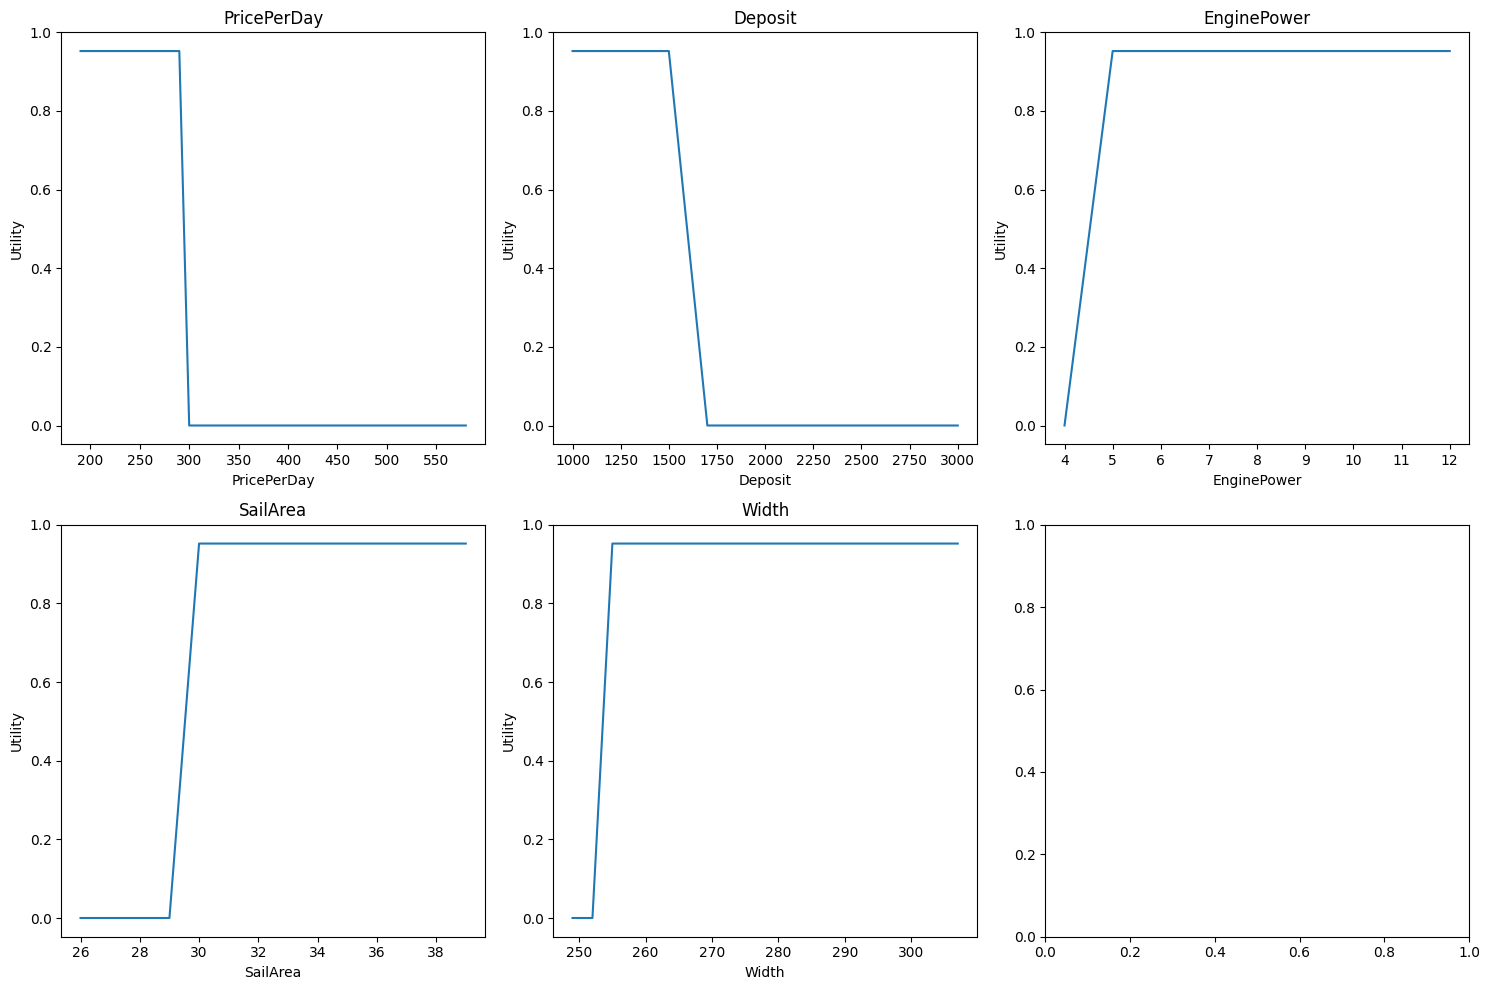

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
temp = [value(PricePerDay_vars[val]) for val in PricePerDay_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[0].plot(PricePerDay_tab, temp)
axs[0].set_title("PricePerDay")
axs[0].set_xlabel("PricePerDay")
axs[0].set_ylabel("Utility")
temp = [value(Deposit_vars[val]) for val in Deposit_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[1].plot(Deposit_tab, temp)
axs[1].set_title("Deposit")
axs[1].set_xlabel("Deposit")
axs[1].set_ylabel("Utility")
temp = [value(EnginePower_vars[val]) for val in EnginePower_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[2].plot(EnginePower_tab, temp)
axs[2].set_title("EnginePower")
axs[2].set_xlabel("EnginePower")
axs[2].set_ylabel("Utility")
temp = [value(SailArea_vars[val]) for val in SailArea_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[3].plot(SailArea_tab, temp)
axs[3].set_title("SailArea")
axs[3].set_xlabel("SailArea")
axs[3].set_ylabel("Utility")
temp = [value(Width_vars[val]) for val in Width_tab]

temp = [(val - min(temp)) / (max(temp) - min(temp) + epsilon) for val in temp]
axs[4].plot(Width_tab, temp)
axs[4].set_title("Width")
axs[4].set_xlabel("Width") 
axs[4].set_ylabel("Utility")

plt.tight_layout()
plt.show()


As we can see after the maximization the distance between the utility of refernce alternatives, the critarion PricePerDay changed. However the other cirteria seems to stay uchanged.

![](./plots/uta.png)

![](./plots/prometheeII.png)
